In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Load and Explore Dataset
Loading the training and test datasets, display sample data, and analyze the structure of the dataset.

Sample data from the training dataset:
                                            question  \
0  Would I ever need credit card if my debit card...   
1  Cheapest way to wire or withdraw money from US...   
2  How do I go about finding an honest  ethical f...   
3                 Why invest in becoming a landlord?   
4  What could be the cause of a extreme highlow p...   

                                              answer  
0  Skimmers are most likely at gas station pumps....  
1  There is a number of cheaper online options th...  
2  Large and wellknown companies are typically a ...  
3  why does it make sense financially to buy prop...  
4  Often these types of trades fall into two diff...  

Sample data from the test dataset:
                                            question  \
0  Company revenue increased however stock price ...   
1  Should I invest in my house, when its in my wi...   
2  Proscons for buying gold vs. saving money in a...   
3  still have mortgage on old hous

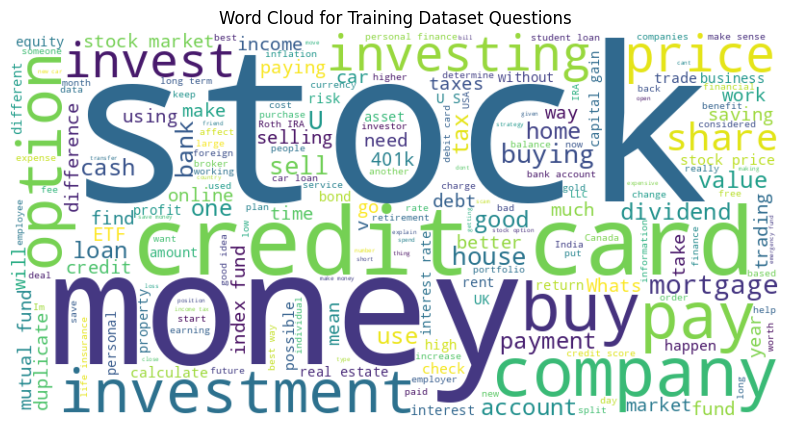

In [ ]:

train_data = pd.read_csv('/content/train_data.csv')
test_data = pd.read_csv('/content/test_data.csv')


print("Sample data from the training dataset:")
print(train_data.head())

print("\nSample data from the test dataset:")
print(test_data.head())


print("\nTraining dataset structure:")
print(train_data.info())


print("\nTest dataset structure:")
print(test_data.info())


print("\nMissing values in the training dataset:")
print(train_data.isnull().sum())


print("\nMissing values in the test dataset:")
print(test_data.isnull().sum())


questions_text = " ".join(train_data['question'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(questions_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Training Dataset Questions")
plt.show()

# Remove Punctuations
Using regular expressions to remove punctuations from the text data.

In [ ]:

import re


def remove_punctuations(text):
    return re.sub(r'[^\w\s]', '', text)


train_data['question'] = train_data['question'].apply(remove_punctuations)
test_data['question'] = test_data['question'].apply(remove_punctuations)


print("\nTraining dataset after removing punctuations:")
print(train_data.head())
print("\nTest dataset after removing punctuations:")
print(test_data.head())


Training dataset after removing punctuations:
                                            question  \
0  Would I ever need credit card if my debit card...   
1  Cheapest way to wire or withdraw money from US...   
2  How do I go about finding an honest  ethical f...   
3                  Why invest in becoming a landlord   
4  What could be the cause of a extreme highlow p...   

                                              answer  
0  Skimmers are most likely at gas station pumps....  
1  There is a number of cheaper online options th...  
2  Large and wellknown companies are typically a ...  
3  why does it make sense financially to buy prop...  
4  Often these types of trades fall into two diff...  

Test dataset after removing punctuations:
                                            question  \
0  Company revenue increased however stock price ...   
1  Should I invest in my house when its in my wif...   
2  Proscons for buying gold vs saving money in an...   
3  still have mortg

# Handle Stop Words

In [ ]:
from nltk.corpus import stopwords


stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)


train_data['question'] = train_data['question'].apply(remove_stop_words)
test_data['question'] = test_data['question'].apply(remove_stop_words)


print("\nTraining dataset after removing stop words:")
print(train_data.head())


print("\nTest dataset after removing stop words:")
print(test_data.head())


Training dataset after removing stop words:
                                            question  \
0  Would ever need credit card debit card issued ...   
1  Cheapest way wire withdraw money US account li...   
2        go finding honest ethical financial advisor   
3                           invest becoming landlord   
4     could cause extreme highlow price hours market   

                                              answer  
0  Skimmers are most likely at gas station pumps....  
1  There is a number of cheaper online options th...  
2  Large and wellknown companies are typically a ...  
3  why does it make sense financially to buy prop...  
4  Often these types of trades fall into two diff...  

Test dataset after removing stop words:
                                            question  \
0      Company revenue increased however stock price   
1                            invest house wifes name   
2  Proscons buying gold vs saving money interestb...   
3  still mortgage old h

# Apply Stemming

In [ ]:
from nltk.stem import PorterStemmer


stemmer = PorterStemmer()


def apply_stemming(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)


train_data['question'] = train_data['question'].apply(apply_stemming)
test_data['question'] = test_data['question'].apply(apply_stemming)


print("\nTraining dataset after applying stemming:")
print(train_data.head())
print("\nTest dataset after applying stemming:")
print(test_data.head())


Training dataset after applying stemming:
                                            question  \
0  would ever need credit card debit card issu ma...   
1  cheapest way wire withdraw money us account li...   
2               go find honest ethic financi advisor   
3                              invest becom landlord   
4        could caus extrem highlow price hour market   

                                              answer  
0  Skimmers are most likely at gas station pumps....  
1  There is a number of cheaper online options th...  
2  Large and wellknown companies are typically a ...  
3  why does it make sense financially to buy prop...  
4  Often these types of trades fall into two diff...  

Test dataset after applying stemming:
                                            question  \
0           compani revenu increas howev stock price   
1                              invest hous wife name   
2  proscon buy gold vs save money interestbas acc...   
3    still mortgag old hous

# Generating Word Cloud
Visualizing the most frequent words in the dataset using a word cloud.

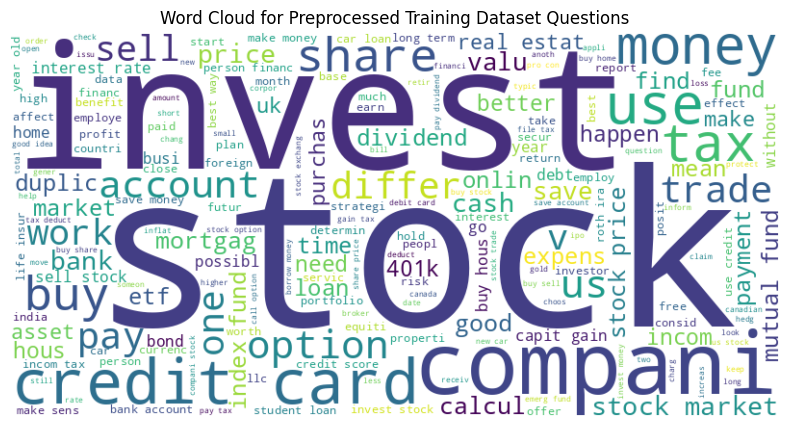

In [ ]:

preprocessed_questions_text = " ".join(train_data['question'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(preprocessed_questions_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Preprocessed Training Dataset Questions")
plt.show()

# Tokenization and Input Formatting
Using Hugging Face's tokenizer to tokenize the text and prepare input tensors for the model.

In [ ]:
from transformers import AutoTokenizer


tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")


def preprocess_text(text):
    return tokenizer(
        text,
        truncation=True,
        padding="max_length",
        max_length=128,
        return_tensors=None,
    )


train_data['input_ids'] = train_data['question'].apply(lambda x: preprocess_text(x)['input_ids'])
train_data['attention_mask'] = train_data['question'].apply(lambda x: preprocess_text(x)['attention_mask'])

test_data['input_ids'] = test_data['question'].apply(lambda x: preprocess_text(x)['input_ids'])
test_data['attention_mask'] = test_data['question'].apply(lambda x: preprocess_text(x)['attention_mask'])


print("\nTraining dataset after preprocessing:")
print(train_data[['question', 'input_ids', 'attention_mask']].head())


print("\nTest dataset after preprocessing:")
print(test_data[['question', 'input_ids', 'attention_mask']].head())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]


Training dataset after preprocessing:
                                            question  \
0  would ever need credit card debit card issu ma...   
1  cheapest way wire withdraw money us account li...   
2               go find honest ethic financi advisor   
3                              invest becom landlord   
4        could caus extrem highlow price hour market   

                                           input_ids  \
0  [101, 2052, 2412, 2342, 4923, 4003, 2139, 1631...   
1  [101, 10036, 4355, 2126, 7318, 10632, 2769, 21...   
2  [101, 2175, 2424, 7481, 3802, 16066, 10346, 23...   
3  [101, 15697, 2022, 9006, 18196, 102, 0, 0, 0, ...   
4  [101, 2071, 6187, 2271, 4654, 7913, 2213, 2152...   

                                      attention_mask  
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ...  
2  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...  
3  [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4  [1, 1, 1,